In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import json
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from basic_units import minutes

Feature was applied at:2024-08-30 12:26:09


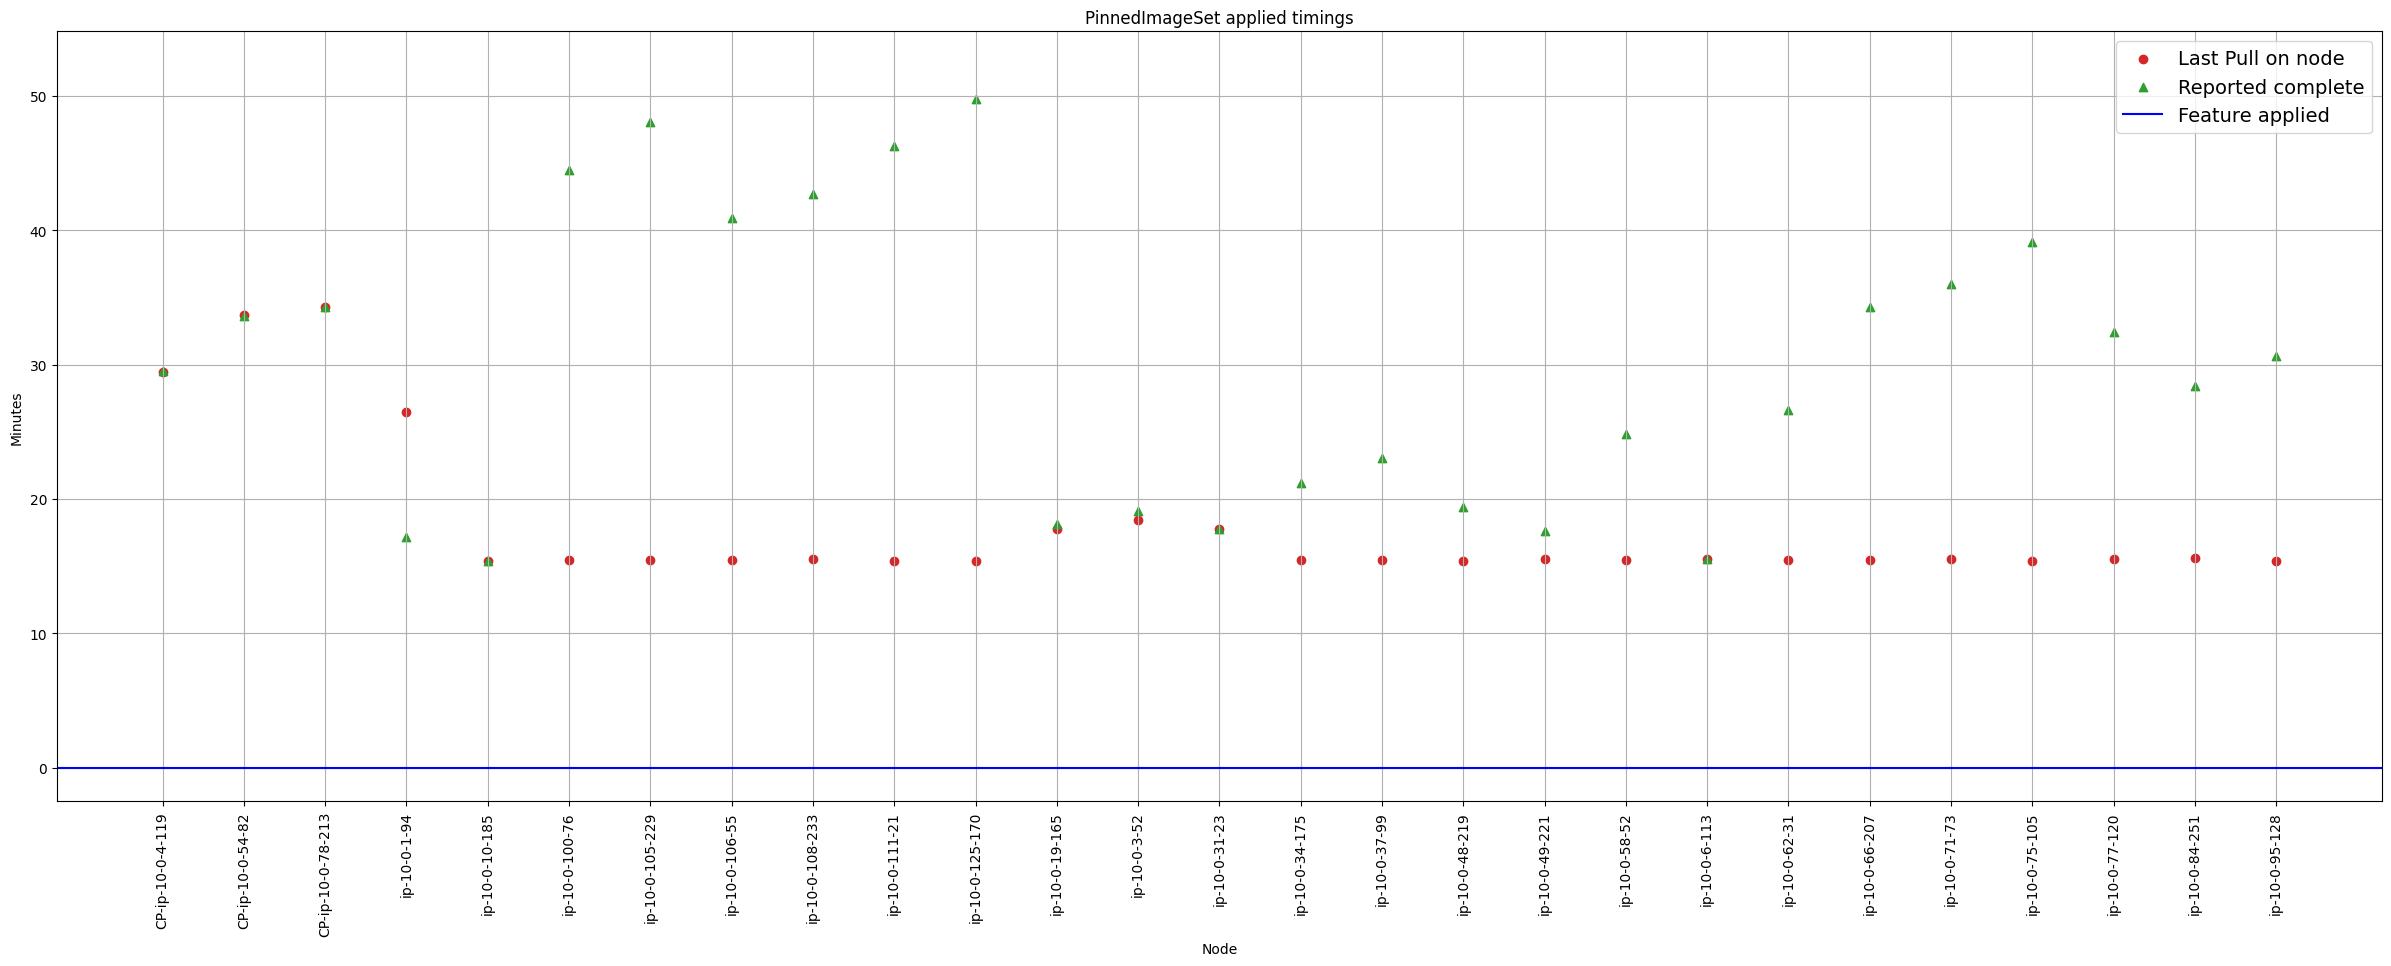

In [4]:
with open('data.json') as file:
    data = json.load(file)

applied_at = datetime.strptime('2024-08-30 12:26:09','%Y-%m-%d %H:%M:%S')
print(f"Feature was applied at:{applied_at}" )

df = pd.DataFrame(data['data'])
df['date_reported'] = round((pd.to_datetime(df['date_reported']) - applied_at).dt.total_seconds() / 60.0, 2)
df['date_last_pull'] = round((pd.to_datetime(df['date_last_pull']) - applied_at).dt.total_seconds() / 60.0, 2)

fig, ax = plt.subplots()
plt.grid(True)
plt.xlabel('Node')
plt.ylabel('Minutes')

ax.scatter(df['node'], df['date_last_pull'], c='tab:red', label="Last Pull on node", yunits=minutes, marker="o")
ax.scatter(df['node'], df['date_reported'], c='tab:green', label="Reported complete", yunits=minutes, marker="^")
ax.set_title('PinnedImageSet applied timings')

plt.axhline(y=0, color='b', linestyle='-', label="Feature applied")

plt.ylim(top=df['date_reported'].max() + 5)
plt.ylim(bottom=-2.5)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.align_xlabels()
fig.set_figwidth(30)
fig.set_figheight(10)
plt.legend(fontsize=14)

plt.show()


In [5]:
x = ["Install Time", "Scale Time"]
y = [round((datetime.strptime("2024-08-30 00:47:02", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-30 00:00:00", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
     round((datetime.strptime("2024-08-30 00:15:37", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-30 00:00:00", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2)]


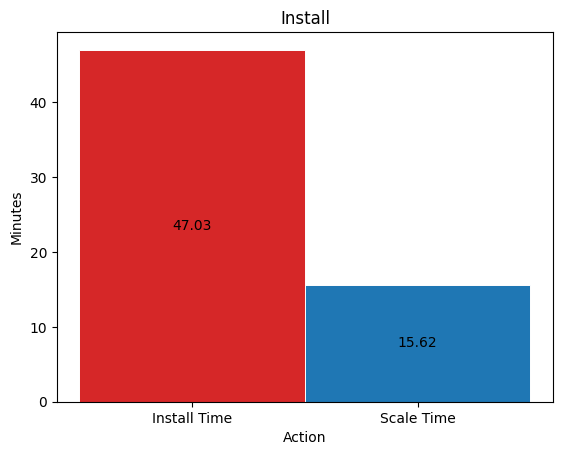

In [6]:
# plot
fig, ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue']
p = ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7, yunits=minutes, color=bar_colors)
ax.bar_label(p, label_type='center')
ax.set_xlabel('Action')
ax.set_ylabel('Minutes')
ax.set_title('Install')

plt.show()

In [7]:
x = ["IPI", "PinnedImageSet 3N*", "PinnedImageSet 24N"]
y = [round((datetime.strptime("2024-08-30 08:34:00", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-30 07:31:07", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
     round((datetime.strptime("2024-08-29 13:29:37", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-29 12:02:32", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
     round((datetime.strptime("2024-08-30 19:39:50", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-30 18:37:39", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2)]




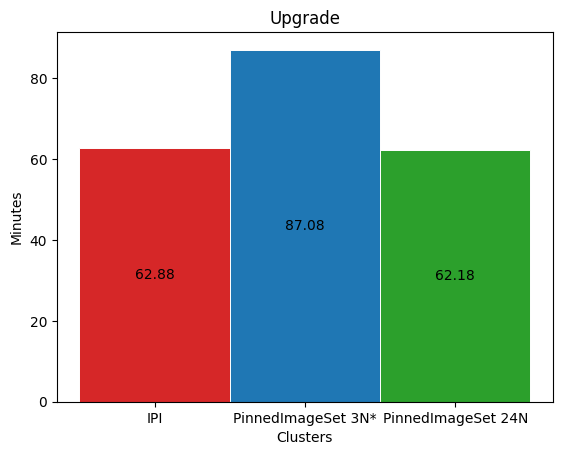

In [8]:
# plot
fig, ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue', 'tab:green']
p = ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7, yunits=minutes, color=bar_colors)
ax.bar_label(p, label_type='center')
ax.set_xlabel('Clusters')
ax.set_ylabel('Minutes')
ax.set_title('Upgrade')

plt.show()

In [9]:
clusters = ["PinnedImageSet 3N", "PinnedImageSet 24N"]

node_times = {
    'Masters': [round((datetime.strptime("2024-08-28 08:36:34", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-28 08:22:06", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
     round((datetime.strptime("2024-08-30 12:41:09", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-30 12:26:09", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2)],
    'Workers': [round((datetime.strptime("2024-08-28 08:30:38", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-28 08:22:06", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
     round((datetime.strptime("2024-08-30 13:15:34", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-08-30 12:26:09", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2)],
}


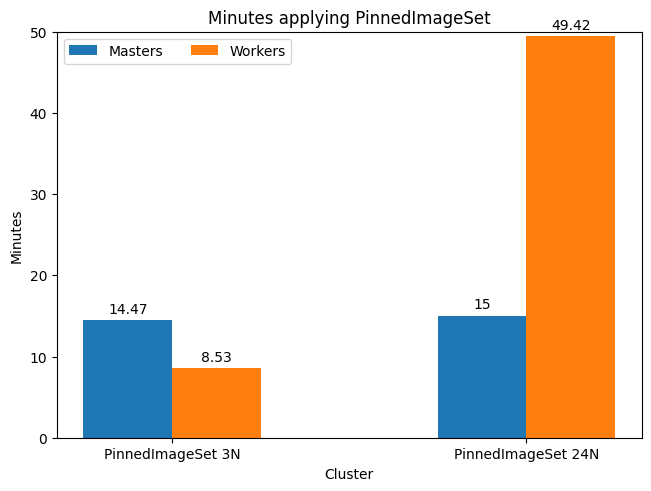

In [10]:
x = np.arange(len(clusters))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in node_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Minutes')
ax.set_xlabel('Cluster')
ax.set_title('Minutes applying PinnedImageSet')
ax.set_xticks(x + (width/2), clusters)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 50)

plt.show()


In [149]:
clusters = ["3 Nodes", "3 Nodes PinnedImageSet", "24 Nodes", "24 Nodes PinnedImageSet"]

node_times = {
    '1': (
        round((datetime.strptime("2024-09-06 10:41:52", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-06 09:29:46", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-11 09:25:52", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-11 08:29:07", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-06 22:00:57", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-06 20:52:02", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-12 15:03:44", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-12 14:03:20", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2)
    ),
    '2': (
        round((datetime.strptime("2024-09-06 13:54:21", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-06 12:50:20", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-11 21:08:04", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-11 20:08:53", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-09 09:33:28", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-09 08:15:42", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-12 23:42:01", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-12 22:39:36", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2)
    ),
    '3': (
        round((datetime.strptime("2024-09-06 16:19:19", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-06 15:16:30", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-12 09:02:44", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-12 08:04:07", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-09 12:40:53", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-09 11:32:36", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2),
        round((datetime.strptime("2024-09-16 12:16:56", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2024-09-16 11:14:11", "%Y-%m-%d %H:%M:%S")).total_seconds() / 60.0, 2)
    ),
}


print(node_times)

{'1': (72.1, 56.75, 68.92, 60.4), '2': (64.02, 59.18, 77.77, 62.42), '3': (62.82, 58.62, 68.28, 62.75)}


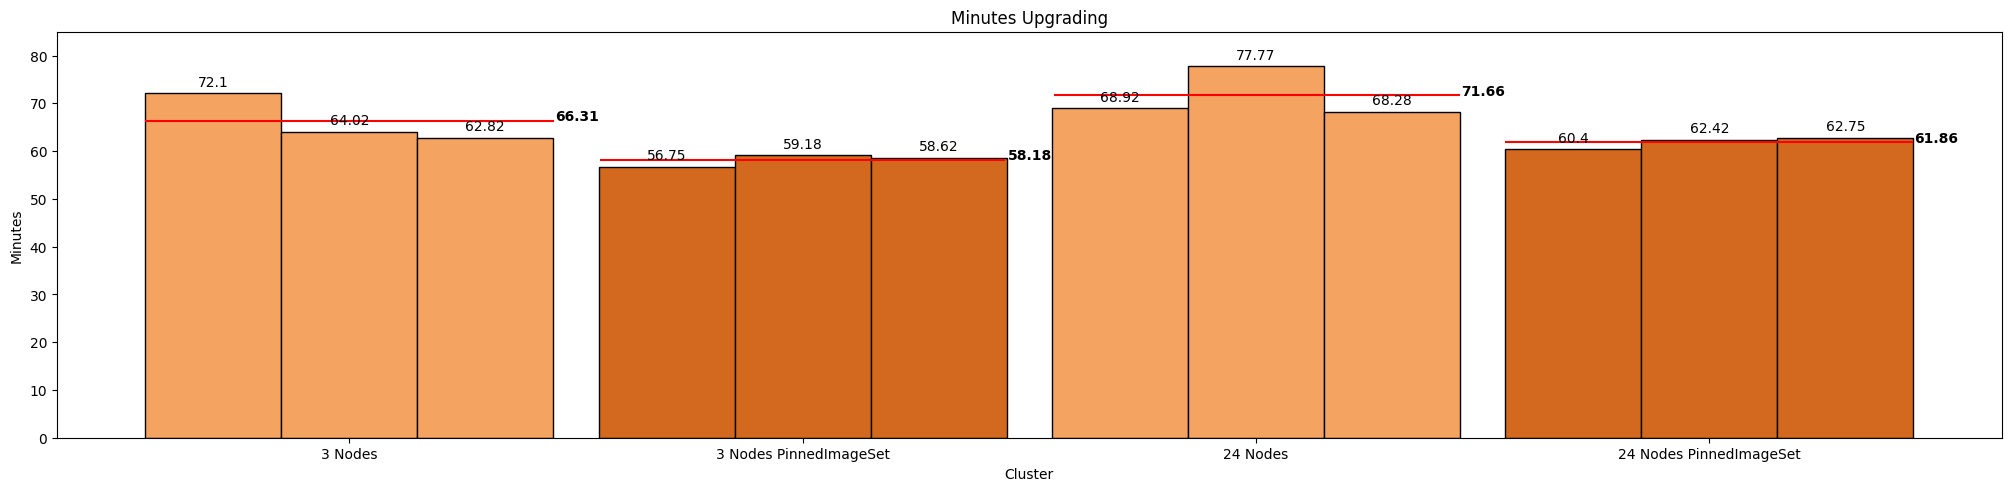

In [186]:
x = np.arange(len(clusters))  # the label locations
width = 0.30  # the width of the bars
multiplier = 0
bar_colors = ['sandybrown','chocolate', 'sandybrown', 'chocolate' ]

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in node_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=bar_colors, edgecolor='black')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Minutes')
ax.set_xlabel('Cluster')
ax.set_title('Minutes Upgrading')
ax.set_xticks(x + (width), clusters)
# ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 85)
fig.set_figwidth(20)

# Averages

runs = len(node_times)
sums = [0,0,0,0]
avgs = []
for attribute, measurement in node_times.items():
    sums[0] = sums[0]+measurement[0]
    sums[1] = sums[1]+measurement[1]
    sums[2] = sums[2]+measurement[2]
    sums[3] = sums[3]+measurement[3]

avgs.append(round(sums[0]/runs, 2))
avgs.append(round(sums[1]/runs, 2))
avgs.append(round(sums[2]/runs, 2))
avgs.append(round(sums[3]/runs, 2))


ax.axhline(y=avgs[0], color='r', linestyle='-',  xmin = 0.046, xmax = 0.255)
ax.text(0.85, avgs[0]+0.9, str(avgs[0]), ha='right', va='center', weight="bold")
ax.axhline(y=avgs[1], color='r', linestyle='-',  xmin = 0.28, xmax = 0.487)
ax.text(1.85, avgs[1]+0.9, str(avgs[1]), ha='right', va='center', weight="bold")
ax.axhline(y=avgs[2], color='r', linestyle='-',  xmin = 0.513, xmax = 0.721)
ax.text(2.85, avgs[2]+0.9, str(avgs[2]), ha='right', va='center', weight="bold")
ax.axhline(y=avgs[3], color='r', linestyle='-',  xmin = 0.745, xmax = 0.954)
ax.text(3.85, avgs[3]+0.9, str(avgs[3]), ha='right', va='center', weight="bold")

plt.show()


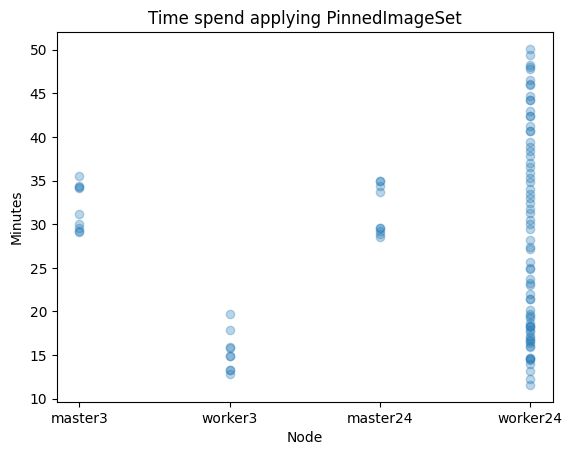

In [187]:
with open('time_applying.json') as file:
    data = json.load(file)

df = pd.DataFrame(data['data'])
df['minutes'] = round((pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_applied'])).dt.total_seconds() / 60.0, 2)
df['combo'] = df['node']+df['worker_count']

X=df['combo'].astype("string") ## Read as string
y=df['minutes']
plt.scatter(X,y, alpha=0.3)
plt.title ('Time spend applying PinnedImageSet')
plt.xlabel('Node')
plt.ylabel('Minutes')
plt.show()